In [1]:
import figures
import numpy as np
import matplotlib.pyplot as plt

alphas = np.array([
    0.0, 0.8480, 8.6126e-02, 2.7199e-02, 1.1198e-02, 6.2547e-03, 4.0326e-03, 2.9872e-03,
    1.9144e-03, 1.5849e-03, 1.5069e-03, 9.6941e-04, 7.7558e-04, 5.2512e-04,
    7.0280e-04, 4.2999e-04, 3.3933e-04, 5.3316e-04, 4.8459e-05, 4.3625e-04,
    3.3927e-04, 1.9389e-04, 1.4544e-04, 1.4544e-04, 1.2118e-04, 1.9383e-04,
    0.0000e+00, 1.8549e-04, 1.4538e-04, 9.6977e-05, 9.6917e-05, 9.6977e-05,
    1.9383e-04,
])
alphas = np.cumsum(alphas)
alphas


array([0.        , 0.848     , 0.934126  , 0.961325  , 0.972523  ,
       0.9787777 , 0.9828103 , 0.9857975 , 0.9877119 , 0.9892968 ,
       0.9908037 , 0.99177311, 0.99254869, 0.99307381, 0.99377661,
       0.9942066 , 0.99454593, 0.99507909, 0.99512755, 0.9955638 ,
       0.99590307, 0.99609696, 0.9962424 , 0.99638784, 0.99650902,
       0.99670285, 0.99670285, 0.99688834, 0.99703372, 0.9971307 ,
       0.99722761, 0.99732459, 0.99751842])

In [2]:
max_budget = 10**4
max_branch_width=32
sequoia, _ = figures.best_tree_unbalanced(
    alphas, max_branch_width=max_branch_width, max_budget=max_budget)
single_chain, independent_chains, k_tree = figures.baselines(
    alphas, max_k=32, max_budget=max_budget, max_branch_width=max_branch_width)


2024-02-01 13:38:41.948: The best tree of size <= 2
2024-02-01 13:38:41.948: Expected length = 1.8479999999999999

2024-02-01 13:38:41.948: The best tree of size <= 4
2024-02-01 13:38:41.948: Expected length = 3.1769041919999994

2024-02-01 13:38:41.948: The best tree of size <= 8
2024-02-01 13:38:41.948: Expected length = 4.81971490673763

2024-02-01 13:38:41.949: The best tree of size <= 16
2024-02-01 13:38:41.949: Expected length = 6.110327347377905

2024-02-01 13:38:41.952: The best tree of size <= 32
2024-02-01 13:38:41.952: Expected length = 7.053767288915535

2024-02-01 13:38:41.960: The best tree of size <= 64
2024-02-01 13:38:41.961: Expected length = 8.068809706311713

2024-02-01 13:38:41.976: The best tree of size <= 128
2024-02-01 13:38:41.976: Expected length = 9.13837869819378

2024-02-01 13:38:42.008: The best tree of size <= 256
2024-02-01 13:38:42.008: Expected length = 10.189729199395437

2024-02-01 13:38:42.075: The best tree of size <= 512
2024-02-01 13:38:42.075: E

In [5]:
print(f'{sequoia.shape=}, {independent_chains.shape=}, {single_chain.shape=}, {k_tree.shape=}')

c.shape=(10001,), independent_chains.shape=(10000,), single_chain.shape=(10000,), exp_lengths_md0.shape=(10001,), exp_lengths_md1.shape=(10001,), k_tree.shape=(31, 10000)


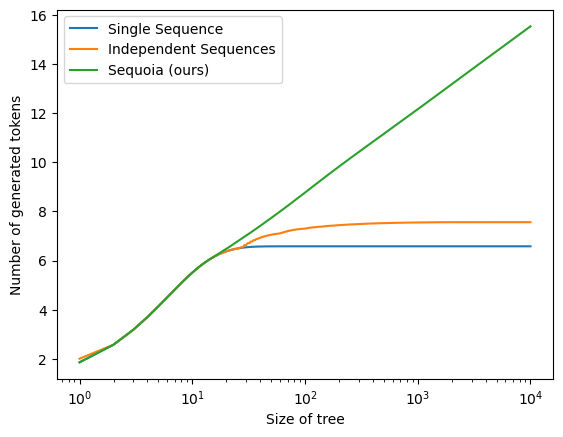

In [8]:
plt.plot(np.arange(1, len(single_chain) + 1), single_chain, label='Single Sequence')
plt.plot(np.arange(1, len(independent_chains) + 1), independent_chains, label='Independent Sequences')
plt.plot(np.arange(1, len(sequoia) - 1), sequoia[2:], label='Sequoia (ours)')
plt.xscale('log')
plt.xlabel('Size of tree')
plt.ylabel('Number of generated tokens')
plt.plot()
plt.legend()